In [363]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
import sqlite3
import seaborn as sns

In [364]:
df=pd.read_csv(r'C:\Users\pauli\Desktop\DataScienceNotebooks\DATA\atlyginimai.csv', delimiter= ',')
df['miestas2']= df['Sav.'].apply(lambda x: x[0:4])
df = df.drop_duplicates(subset=['miestas2'], keep='first')
df.head()

,Sav.,"Bruto, EUR",Pokytis proc. per metus,"Neto, EUR",Pokytis proc. per metus.1,miestas2
0,Šalies ūkis,"2 000,1","12,3","1 241,2","11,2",Šali
1,Akmenės r. sav.,"1 758,8",14,"1 111,9","12,7",Akme
2,Alytaus m. sav.,"1 685,4","10,5","1 073,7","9,9",Alyt
4,Anykščių r. sav.,"1 537,7","11,5","996,7","10,9",Anyk
5,Birštono sav.,"1 645,0","16,2","1 052,6","14,7",Birš


In [365]:
df['Bruto, EUR'] = df['Bruto, EUR'].astype(str).apply(lambda x: x.replace('\xa0', ''))
df['Bruto, EUR'] = df['Bruto, EUR'].apply(lambda x: x.replace(',','.'))
df['Bruto, EUR'] = df['Bruto, EUR'].astype(float)

In [366]:
vidurks = df['Bruto, EUR'].mean()
print(vidurks)

1656.3399999999997


In [367]:
df.head()

,Sav.,"Bruto, EUR",Pokytis proc. per metus,"Neto, EUR",Pokytis proc. per metus.1,miestas2
0,Šalies ūkis,2000.1,"12,3","1 241,2","11,2",Šali
1,Akmenės r. sav.,1758.8,14,"1 111,9","12,7",Akme
2,Alytaus m. sav.,1685.4,"10,5","1 073,7","9,9",Alyt
4,Anykščių r. sav.,1537.7,"11,5","996,7","10,9",Anyk
5,Birštono sav.,1645.0,"16,2","1 052,6","14,7",Birš


In [368]:

SDB = sqlite3.connect(r'C:\Users\pauli\Desktop\DataScienceNotebooks\DATA\WEBscr.db')
Cs = SDB.cursor()
sql="""SELECT * FROM TUrl;"""
Cs.execute(sql)
ans = Cs.fetchall()
df1 = pd.read_sql_query(sql, con=SDB)
df1.head(3)

,id,url,name,params
0,26564780,https://autoplius.lt/skelbimai/kita-kita-krovi...,-Kita-,-Kita- -kita-;2008-09;Krovininis mikroautobusa...
1,25881234,https://autoplius.lt/skelbimai/kita-kita-sedan...,-Kita-,-Kita- -kita-;2011;Sedanas;Elektra;Automatinė;...
2,26631227,https://autoplius.lt/skelbimai/kita-kita-hecbe...,-Kita-,-Kita- -kita-;2020-02;Hečbekas;Elektra;Automat...


In [369]:
df1['miestas']= df1['params'].apply(lambda x: str(x.split(';')[-2]))

In [370]:
df1

,id,url,name,params,miestas
0,26564780,https://autoplius.lt/skelbimai/kita-kita-krovi...,-Kita-,-Kita- -kita-;2008-09;Krovininis mikroautobusa...,Utena
1,25881234,https://autoplius.lt/skelbimai/kita-kita-sedan...,-Kita-,-Kita- -kita-;2011;Sedanas;Elektra;Automatinė;...,Jurbarkas
2,26631227,https://autoplius.lt/skelbimai/kita-kita-hecbe...,-Kita-,-Kita- -kita-;2020-02;Hečbekas;Elektra;Automat...,Kėdainiai
3,26331698,https://autoplius.lt/skelbimai/kita-kita-41-kw...,-Kita-,-Kita- -kita-;2024;Krovininis mikroautobusas;E...,Vilnius
4,25604691,https://autoplius.lt/skelbimai/abarth-124-spid...,Abarth,Abarth 124 Spider;2017;Kabrioletas;Benzinas;Me...,Kaunas
...,...,...,...,...,...
40494,25832798,https://autoplius.lt/skelbimai/volvo-v60-2-0-l...,Volvo,Volvo V60;2023-01;Universalas;Benzinas / elekt...,Vilnius
40495,26517994,https://autoplius.lt/skelbimai/volvo-v40-unive...,Volvo,Volvo V40;2004;Universalas;Dyzelinas;Mechaninė...,Kaunas
40496,26638605,https://autoplius.lt/skelbimai/volvo-s40-1-9-l...,Volvo,Volvo S40;2003-04;Sedanas;Dyzelinas;Mechaninė;...,Vilnius
40497,26465206,https://autoplius.lt/skelbimai/volvo-v70-2-5-l...,Volvo,Volvo V70;1999;Universalas;Dyzelinas;Mechaninė...,Kaišiadorys


In [371]:
df1['kaina']= df1['params'].apply(lambda x: str(x.split(';')[-1]))
df1['kaina']= df1['kaina'].apply(lambda x: str(x.split('€')[0]).replace(' ','').replace('€',''))

In [372]:
df1

,id,url,name,params,miestas,kaina
0,26564780,https://autoplius.lt/skelbimai/kita-kita-krovi...,-Kita-,-Kita- -kita-;2008-09;Krovininis mikroautobusa...,Utena,1750
1,25881234,https://autoplius.lt/skelbimai/kita-kita-sedan...,-Kita-,-Kita- -kita-;2011;Sedanas;Elektra;Automatinė;...,Jurbarkas,3900
2,26631227,https://autoplius.lt/skelbimai/kita-kita-hecbe...,-Kita-,-Kita- -kita-;2020-02;Hečbekas;Elektra;Automat...,Kėdainiai,6800
3,26331698,https://autoplius.lt/skelbimai/kita-kita-41-kw...,-Kita-,-Kita- -kita-;2024;Krovininis mikroautobusas;E...,Vilnius,60500
4,25604691,https://autoplius.lt/skelbimai/abarth-124-spid...,Abarth,Abarth 124 Spider;2017;Kabrioletas;Benzinas;Me...,Kaunas,18900
...,...,...,...,...,...,...
40494,25832798,https://autoplius.lt/skelbimai/volvo-v60-2-0-l...,Volvo,Volvo V60;2023-01;Universalas;Benzinas / elekt...,Vilnius,55900
40495,26517994,https://autoplius.lt/skelbimai/volvo-v40-unive...,Volvo,Volvo V40;2004;Universalas;Dyzelinas;Mechaninė...,Kaunas,500
40496,26638605,https://autoplius.lt/skelbimai/volvo-s40-1-9-l...,Volvo,Volvo S40;2003-04;Sedanas;Dyzelinas;Mechaninė;...,Vilnius,500
40497,26465206,https://autoplius.lt/skelbimai/volvo-v70-2-5-l...,Volvo,Volvo V70;1999;Universalas;Dyzelinas;Mechaninė...,Kaišiadorys,500


In [373]:
df1['miestas2']= df1['miestas'].apply(lambda x: (x[0:4]))

In [374]:
df1.head()

,id,url,name,params,miestas,kaina,miestas2
0,26564780,https://autoplius.lt/skelbimai/kita-kita-krovi...,-Kita-,-Kita- -kita-;2008-09;Krovininis mikroautobusa...,Utena,1750,Uten
1,25881234,https://autoplius.lt/skelbimai/kita-kita-sedan...,-Kita-,-Kita- -kita-;2011;Sedanas;Elektra;Automatinė;...,Jurbarkas,3900,Jurb
2,26631227,https://autoplius.lt/skelbimai/kita-kita-hecbe...,-Kita-,-Kita- -kita-;2020-02;Hečbekas;Elektra;Automat...,Kėdainiai,6800,Kėda
3,26331698,https://autoplius.lt/skelbimai/kita-kita-41-kw...,-Kita-,-Kita- -kita-;2024;Krovininis mikroautobusas;E...,Vilnius,60500,Viln
4,25604691,https://autoplius.lt/skelbimai/abarth-124-spid...,Abarth,Abarth 124 Spider;2017;Kabrioletas;Benzinas;Me...,Kaunas,18900,Kaun


In [375]:
df2 = pd.merge(df1, df[['miestas2', 'Bruto, EUR']], on='miestas2', how='left')

In [376]:
df2['kaina'] = df2['kaina'].str.replace(r'\s+', '', regex=True)
df2['kaina'] = pd.to_numeric(df2['kaina'], errors='coerce')

In [377]:
df2.head()

,id,url,name,params,miestas,kaina,miestas2,"Bruto, EUR"
0,26564780,https://autoplius.lt/skelbimai/kita-kita-krovi...,-Kita-,-Kita- -kita-;2008-09;Krovininis mikroautobusa...,Utena,1750,Uten,1642.8
1,25881234,https://autoplius.lt/skelbimai/kita-kita-sedan...,-Kita-,-Kita- -kita-;2011;Sedanas;Elektra;Automatinė;...,Jurbarkas,3900,Jurb,1565.2
2,26631227,https://autoplius.lt/skelbimai/kita-kita-hecbe...,-Kita-,-Kita- -kita-;2020-02;Hečbekas;Elektra;Automat...,Kėdainiai,6800,Kėda,1818.9
3,26331698,https://autoplius.lt/skelbimai/kita-kita-41-kw...,-Kita-,-Kita- -kita-;2024;Krovininis mikroautobusas;E...,Vilnius,60500,Viln,2290.7
4,25604691,https://autoplius.lt/skelbimai/abarth-124-spid...,Abarth,Abarth 124 Spider;2017;Kabrioletas;Benzinas;Me...,Kaunas,18900,Kaun,2046.2


In [378]:
df3=df2.groupby('miestas').mean('kaina')
df3

,kaina,"Bruto, EUR"
miestas,,
100 000 km,36500.000000,NaN
100 700 km,920.000000,NaN
101 000 km,17795.000000,NaN
101 966 km,12900.000000,NaN
105 000 km,25400.000000,NaN
...,...,...
Šilalė,7946.433333,1503.4
Šilutė,6902.494845,1557.9
Širvintos,10450.661017,1634.4


In [379]:
df3['kaina']=round(df3['kaina'], 0)

In [380]:
df3 = df3.dropna()


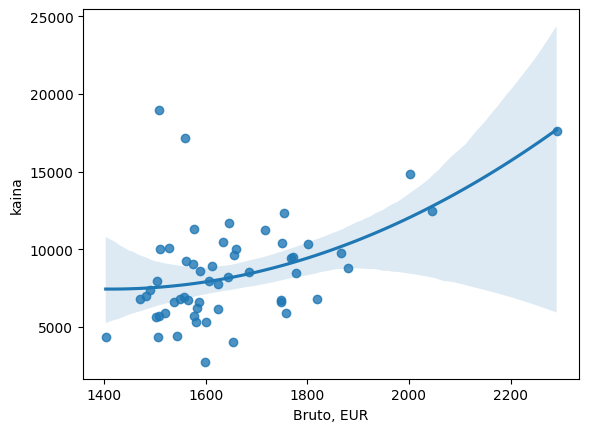

In [381]:
axis=sns.regplot(data=df3, x='Bruto, EUR', y='kaina', order=2)
# axis.set_xlim(0, 5e5)
# axis.set_ylim(0, 6e4)
plt.show()

In [382]:
#Ar tokia pat priklausomybė egzistuoja atsižvelgiant į automobilių gamintoją
# (Imti top 5 autogamintojus), kuro rūšį, kėbulo tipą, pasinaudokite seaborn lmplot(). 
#X ašyje vietoj vidutinių atlyginimų pabndykite atvaizduoti Miestų pavadinimus, 
# iš kurių paimti vidutiniai atlyginimai.

In [416]:
dftop = df2.groupby('name').count()
dftop = dftop.sort_values(by='id', ascending=False)
dftop = dftop.head(5)
top5 = dftop.index.to_list()

print(top5)

['BMW', 'Volkswagen', 'Audi', 'Mercedes-Benz', 'Toyota']


In [420]:
df4 = df2[df2['name'].isin(top5)]
df4.head()

,id,url,name,params,miestas,kaina,miestas2,"Bruto, EUR"
191,25857424,https://autoplius.lt/skelbimai/audi-a4-2-0-l-s...,Audi,Audi A4;2015;Sedanas;Benzinas;Automatinė;2.0 l...,Kretinga,10800,Kret,1527.7
192,26909425,https://autoplius.lt/skelbimai/audi-a4-allroad...,Audi,Audi A4 allroad;2017-09;Universalas;Dyzelinas;...,Alytus,15999,Alyt,1685.4
193,26894111,https://autoplius.lt/skelbimai/audi-a6-2-0-l-u...,Audi,Audi A6;2013-04;Universalas;Dyzelinas;Automati...,Kuršėnai,7450,Kurš,NaN
194,26900519,https://autoplius.lt/skelbimai/audi-a6-3-0-l-u...,Audi,Audi A6;2011-10;Universalas;Dyzelinas;Automati...,Klaipėda,12000,Klai,2002.5
195,26019242,https://autoplius.lt/skelbimai/audi-q8-3-0-l-v...,Audi,Audi Q8;2019-11;Visureigis / Krosoveris;Benzin...,"Jūrmala, Latvija",49500,Jūrm,NaN


In [421]:
df4 = df4.groupby(['miestas2', 'name'])['kaina'].mean().reset_index()
df4.head()

,miestas2,name,kaina
0,100,Audi,920.0
1,100,BMW,36500.0
2,101,Mercedes-Benz,24900.0
3,105,Mercedes-Benz,25400.0
4,113,Mercedes-Benz,29500.0


In [422]:
df4=pd.merge(df4, df[['miestas2', 'Bruto, EUR']], on='miestas2', how='left')

In [423]:
df4 = df4.dropna()

In [424]:
df4

,miestas2,name,kaina,"Bruto, EUR"
36,Akme,Audi,3533.333333,1758.8
37,Akme,BMW,6466.666667,1758.8
38,Akme,Mercedes-Benz,6125.000000,1758.8
39,Akme,Volkswagen,3420.000000,1758.8
40,Alyt,Audi,9812.763158,1685.4
...,...,...,...,...
382,Šven,Audi,5833.333333,1506.9
383,Šven,BMW,5633.333333,1506.9
384,Šven,Mercedes-Benz,4500.000000,1506.9
385,Šven,Toyota,2475.000000,1506.9


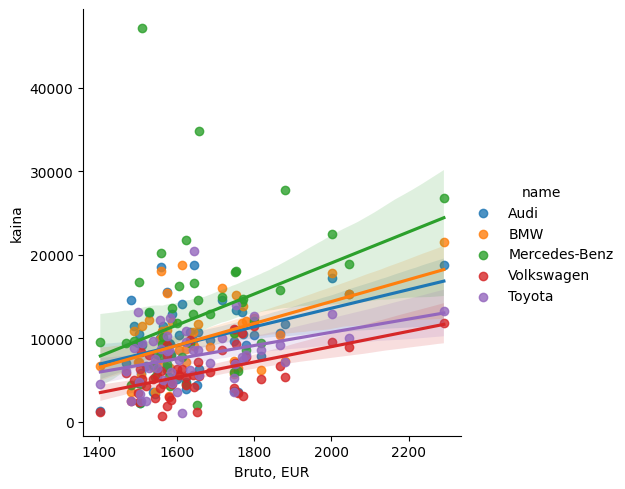

In [425]:
sns.lmplot(x="Bruto, EUR", y="kaina", data=df4, hue="name")
plt.show()